In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hdfcbo-112000-to-22321/HDFCBANK.BO.csv
/kaggle/input/liabilities-of-banks-in-india-20102020-by-rbi/Liabilities_and_Assets_of_Scheduled_Commercial_Banks.xls


**In this project we will analyse HDFC Stock price from 21st March 2001 to 21st March 2021**

*All data collected from BSE*
*Top 7 private banks*

We will be doing 
1. Data set importing
2. Resampling
3. Moving Windows (i.e how did stock did with duration of time like monthly, quaterly etc)
4. Volatility (of stocks in company which stock is more stable and which is more volatile and so on)

* study candle graph for prediction analysis

### Side Note
stock prices depend on 
1. Technical data(price/volume)
2. Fundamentals (quarterly reports, annual reports etc)
3. Exogenous data (other public data: Twitter (Elon ka twits yaah hai na :-P), news, etc
4. Insider information (non-public)

personally I believe we can't beat market because of expert vs mass (remember that statistic ex. bull wala)

Why I believe I can't beat the market
        Efficient Market Hypothesis (EMH)
> As per EMH Stock prices always reflect all available information.
Stocks always trade at their fair value - never undervalued/ overvalued.
sure might get lucky sometimes but EMH says u must be consistant

but again due to human element market is not perfect.

So why did the crisis of 2008 occured at 1st place . People say it was outcome of housing bubblw but what did let to ccreation of this bubble 
> Man's greed, 
so can Human element create such a big impact.
How to predict such diseaster?
> If Data was manipulated, so can we even predict this?

In this tech-age every1 wants to win the market with bleeding edge technology. With IT tech it is easy to influence a huge no of people to manipulate stocks example game stock.

How to counter/control human intervention?
stocks price can easily be increased if people starts demanding particular stock.
How to predict this?
elon mask can easily manioulate stocks price we have seen him manipulating price of bitcoin.
**How to win?**

**Note**
why we have different price on BSE and NSE?
* Stock exchange hai dono. Stock exchange ka kam hai buyer or seller ko milana
* NSE has more compared to BSE, But why?
* due to supply cand demand we see different prices on NSE and BSE

**Fibonacci Retracement**

0,1,1,2,3,5,8,13......................


* if market is going down and we believe that it will go up then we can try to retrace its upward move using FIBONACCI RETRACEMENT.

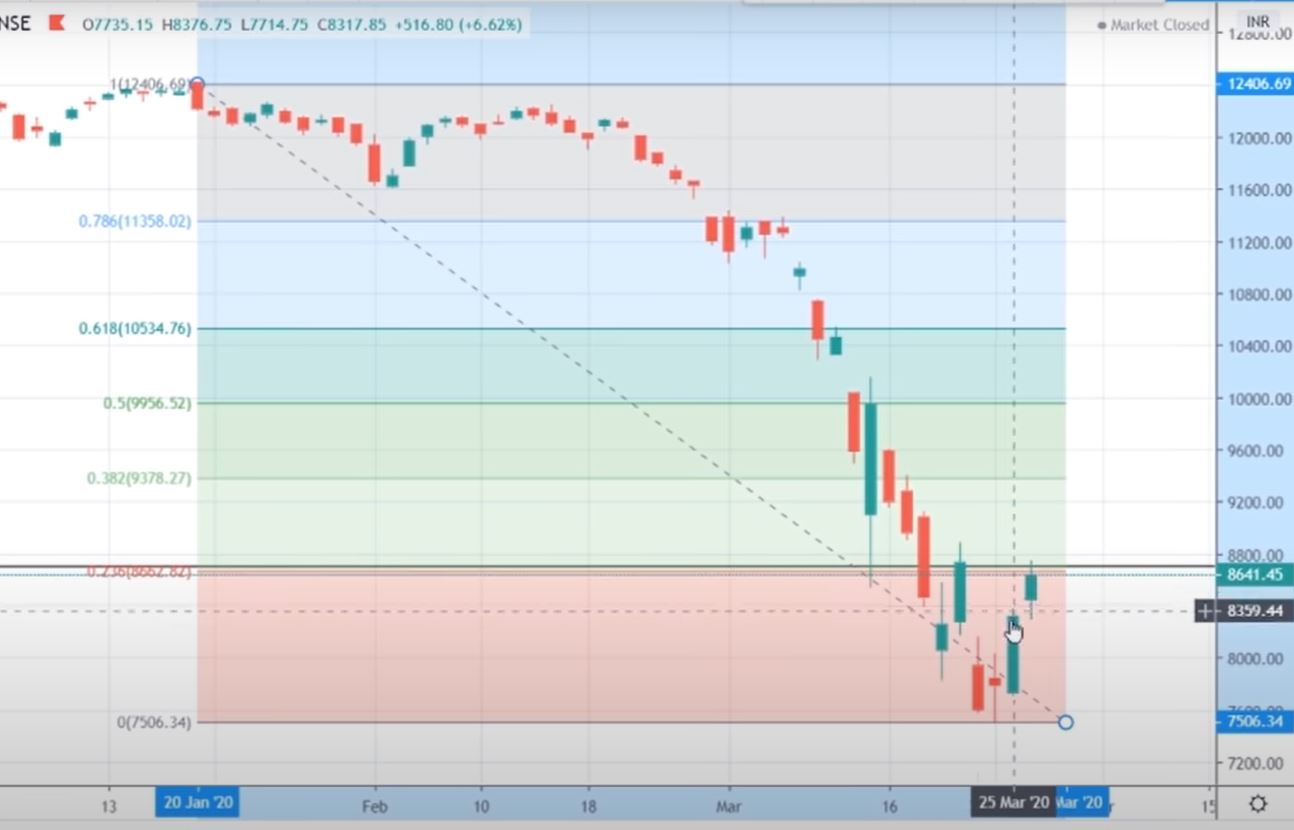
 

## Factors on which price of Bank's stock price depends

* Abstract factors that can affect a bank's share price include overall market sentiment, expectations about the future, and the demand for banking services.
* Investors look at a bank's growth potential as a key valuation factor when determining a fair value for the stock.
* A bank's share price can be affected by three types of risk: interest rate risk, counterparty risk, and regulatory risk.
* A bank's share price can also be impacted by its price-to-earnings (P/E) ratio and price-to-book (P/B) value.

Stock prices also depends on
1. Monetary Policy
2. Politics
3. Exchange Rate
4. Gold prices and Bonds
5. Firm related facts
6. Natural/Man-made disasters

In [2]:
pip install xlrd

     |████████████████████████████████| 96 kB 2.4 MB/s 
Note: you may need to restart the kernel to use updated packages.


In [3]:
'''# importing data on Liabilities and assets of banks in India - collected from RBI site

# since we are dealing with xls file we need to install it first or we will get following error
#Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.

file= '../input/liabilities-of-banks-in-india-20102020-by-rbi/Liabilities_and_Assets_of_Scheduled_Commercial_Banks.xls'


asset= pd.read_excel(file,sheet_name = 'ASSETS') 
liability = pd.read_excel(file,sheet_name = 'LIABILITIES')
'''

"# importing data on Liabilities and assets of banks in India - collected from RBI site\n\n# since we are dealing with xls file we need to install it first or we will get following error\n#Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.\n\nfile= '../input/liabilities-of-banks-in-india-20102020-by-rbi/Liabilities_and_Assets_of_Scheduled_Commercial_Banks.xls'\n\n\nasset= pd.read_excel(file,sheet_name = 'ASSETS') \nliability = pd.read_excel(file,sheet_name = 'LIABILITIES')\n"

In [4]:
l='../input/hdfcbo-112000-to-22321/HDFCBANK.BO.csv'
df=pd.read_csv(l)

In [5]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,16.500000,17.440001,16.500000,17.440001,14.877015,1121190.0
1,2000-01-04,17.950001,18.700001,17.025000,17.400000,14.842893,3301180.0
2,2000-01-05,16.549999,17.299999,16.200001,16.850000,14.373722,1492490.0
3,2000-01-06,16.990000,17.080000,16.600000,16.750000,14.288413,702680.0
4,2000-01-07,16.500000,16.990000,16.250000,16.950001,14.459026,1830260.0
...,...,...,...,...,...,...,...
5308,2021-03-15,1548.050049,1548.050049,1515.650024,1529.150024,1529.150024,133928.0
5309,2021-03-16,1529.000000,1540.000000,1509.500000,1512.800049,1512.800049,277382.0
5310,2021-03-17,1518.000000,1538.650024,1490.000000,1495.650024,1495.650024,329993.0
5311,2021-03-18,1508.000000,1521.800049,1481.150024,1490.349976,1490.349976,284777.0


Even if we use head() and .tail() it will also show same data as df output

### One imp thing before moving ahead make ur date as index

In [6]:
hdfc=pd.read_csv(l, header=0 , index_col= 'Date', parse_dates= True)

In [7]:
hdfc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,16.500000,17.440001,16.500000,17.440001,14.877015,1121190.0
2000-01-04,17.950001,18.700001,17.025000,17.400000,14.842893,3301180.0
2000-01-05,16.549999,17.299999,16.200001,16.850000,14.373722,1492490.0
2000-01-06,16.990000,17.080000,16.600000,16.750000,14.288413,702680.0
2000-01-07,16.500000,16.990000,16.250000,16.950001,14.459026,1830260.0
...,...,...,...,...,...,...
2021-03-15,1548.050049,1548.050049,1515.650024,1529.150024,1529.150024,133928.0
2021-03-16,1529.000000,1540.000000,1509.500000,1512.800049,1512.800049,277382.0
2021-03-17,1518.000000,1538.650024,1490.000000,1495.650024,1495.650024,329993.0


### Now we will import other banks data using .get_data_yahoo
since HDFC data's date start from 2001-07-20 till 19th march 2021
so we will import data with same date for other banks too.

In [8]:
import pandas_datareader as pdr

In [9]:
import datetime

In [10]:
#PNB
pnb= pdr.get_data_yahoo('PNB.BO', start = datetime.datetime(2000,1,1),
                       end=datetime.datetime(2021,3,19))


In [11]:
pnb

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2002-04-29,7.820000,6.980000,6.980000,7.780000,4301570.0,5.711781
2002-04-30,8.070000,7.720000,7.880000,8.000000,2770365.0,5.873294
2002-05-01,8.000000,8.000000,8.000000,8.000000,0.0,5.873294
2002-05-02,9.200000,8.110000,8.180000,8.950000,6748655.0,6.570749
2002-05-03,9.500000,8.920000,9.300000,9.300000,6881610.0,6.827706
...,...,...,...,...,...,...
2021-03-15,41.150002,39.750000,41.000000,40.799999,4353756.0,40.799999
2021-03-16,41.400002,39.599998,41.299999,39.799999,6506007.0,39.799999
2021-03-17,39.950001,38.000000,39.900002,38.299999,7240571.0,38.299999


here u can see we got less data as server didn't have data before 2002-04-29

find the reason

In [12]:
# I was curious if HDFC and PNB have same data type or not
type(pnb) , type (hdfc)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [13]:
# ICICI
icici= pdr.get_data_yahoo('ICICIBANK.BO', start = datetime.datetime(2000,1,1),
                       end=datetime.datetime(2021,3,19))
icici

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,13.736363,13.090909,13.636363,13.736363,2611840.0,9.699529
2000-01-04,14.618181,13.145454,14.445454,13.390909,1544647.0,9.455597
2000-01-05,13.454545,12.327272,13.181818,12.600000,2402119.0,8.897120
2000-01-06,13.509090,12.545454,12.727272,12.572727,1404452.0,8.877862
2000-01-07,12.727272,11.818181,12.027272,12.000000,2163958.0,8.473447
...,...,...,...,...,...,...
2021-03-15,612.599976,590.650024,611.099976,603.250000,4022201.0,603.250000
2021-03-16,608.150024,593.599976,608.150024,594.900024,497318.0,594.900024
2021-03-17,603.549988,586.900024,595.549988,589.250000,524768.0,589.250000


In [14]:
# Axis bank AXISBANK.BO
axis= pdr.get_data_yahoo('AXISBANK.BO', start = datetime.datetime(2000,1,1),
                       end=datetime.datetime(2021,3,19))
axis

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,5.180000,5.100000,5.100000,5.180000,82500.0,3.704450
2000-01-04,5.510000,5.080000,5.400000,5.380000,494000.0,3.847478
2000-01-05,5.420000,5.000000,5.010000,5.240000,383000.0,3.747357
2000-01-06,5.300000,5.000000,5.300000,5.110000,164500.0,3.654390
2000-01-07,5.220000,4.800000,5.000000,4.860000,149000.0,3.475602
...,...,...,...,...,...,...
2021-03-15,753.599976,717.049988,753.000000,744.650024,514509.0,744.650024
2021-03-16,751.000000,736.000000,749.000000,737.599976,391696.0,737.599976
2021-03-17,741.900024,724.650024,737.000000,727.849976,264444.0,727.849976


In [15]:
indus= pdr.get_data_yahoo('INDUSINDBK.BO', start = datetime.datetime(2000,1,1),
                       end=datetime.datetime(2021,3,19))
indus

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2002-01-14,10.350000,10.150000,10.150000,10.300000,8600.0,7.635148
2002-01-15,10.300000,10.200000,10.300000,10.250000,5360.0,7.598083
2002-01-16,10.350000,10.200000,10.300000,10.350000,1190.0,7.672209
2002-01-17,10.400000,10.150000,10.250000,10.200000,6165.0,7.561019
2002-01-18,10.500000,10.050000,10.500000,10.350000,9861.0,7.672209
...,...,...,...,...,...,...
2021-03-15,1042.949951,988.000000,1020.000000,1038.550049,479375.0,1038.550049
2021-03-16,1049.900024,1027.900024,1048.650024,1035.300049,265306.0,1035.300049
2021-03-17,1038.949951,1001.549988,1030.099976,1009.049988,218735.0,1009.049988


In [16]:
kotak= pdr.get_data_yahoo('KOTAKBANK.BO', start = datetime.datetime(2000,1,1),
                       end=datetime.datetime(2021,3,19))
kotak

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,9.945819,9.832369,9.832369,9.945819,39761.0,8.708639
2000-01-04,10.739972,10.010330,10.739972,10.739972,883270.0,9.404007
2000-01-05,10.900137,9.881308,10.739972,10.277272,916333.0,8.998862
2000-01-06,10.855647,9.654407,10.811157,9.988085,315551.0,8.745646
2000-01-07,9.701122,9.189483,9.342975,9.189483,407189.0,8.046384
...,...,...,...,...,...,...
2021-03-15,1942.199951,1894.000000,1937.650024,1918.699951,114257.0,1918.699951
2021-03-16,1940.849976,1900.000000,1918.699951,1903.800049,106175.0,1903.800049
2021-03-17,1917.050049,1860.250000,1897.150024,1867.949951,68594.0,1867.949951


In [17]:
yes= pdr.get_data_yahoo('YESBANK.BO', start = datetime.datetime(2000,1,1),
                       end=datetime.datetime(2021,3,19))
yes

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2005-07-12,14.00,12.03,13.00,12.16,130706350.0,10.754069
2005-07-13,12.47,11.48,12.29,11.70,28784240.0,10.347256
2005-07-14,11.96,11.40,11.88,11.46,6810720.0,10.135006
2005-07-15,12.88,11.25,11.56,12.35,36693185.0,10.922104
2005-07-18,13.13,12.47,12.56,12.85,30424025.0,11.364293
...,...,...,...,...,...,...
2021-03-15,15.70,15.40,15.70,15.65,15913879.0,15.650000
2021-03-16,15.65,15.40,15.60,15.45,10802872.0,15.450000
2021-03-17,15.55,15.05,15.50,15.10,16742488.0,15.100000


In [18]:
idbi= pdr.get_data_yahoo('IDBI.BO', start = datetime.datetime(2000,1,1),
                       end=datetime.datetime(2021,3,19))
idbi

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,24.750000,24.750000,24.750000,24.750000,96840.0,12.470884
2000-01-04,26.718750,24.312500,26.718750,26.718750,1049059.0,13.462889
2000-01-05,26.406250,24.687500,25.062500,25.000000,443934.0,12.596852
2000-01-06,25.937500,24.031250,25.312500,24.062500,553912.0,12.124472
2000-01-07,24.375000,23.156250,24.375000,23.750000,367536.0,11.967013
...,...,...,...,...,...,...
2021-03-15,42.700001,39.700001,42.650002,40.349998,5087929.0,40.349998
2021-03-16,40.849998,38.250000,40.450001,38.650002,3592628.0,38.650002
2021-03-17,38.849998,35.599998,38.700001,35.849998,3942186.0,35.849998


In [19]:
# fedral bank
fbl= pdr.get_data_yahoo('FEDERALBNK.BO', start = datetime.datetime(2000,1,1),
                       end=datetime.datetime(2021,3,19))
fbl


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1.399631,1.278753,1.278753,1.399631,517922.0,0.891489
2000-01-04,1.509056,1.323287,1.509056,1.367821,656715.0,0.871228
2000-01-05,1.372910,1.259667,1.372910,1.259667,434221.0,0.802339
2000-01-06,1.297839,1.246944,1.246944,1.272391,442080.0,0.810444
2000-01-07,1.272391,1.196048,1.272391,1.196048,692003.0,0.761818
...,...,...,...,...,...,...
2021-03-15,85.599998,81.300003,85.349998,83.750000,1898279.0,83.750000
2021-03-16,84.849998,82.500000,83.949997,83.599998,1170259.0,83.599998
2021-03-17,84.000000,79.650002,84.000000,80.150002,1228308.0,80.150002


## *PSB*

In [20]:
sbi= pdr.get_data_yahoo('SBIN.BO', start = datetime.datetime(2000,1,1),
                       end=datetime.datetime(2021,3,19))
sbi

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,22.899250,21.927423,21.927423,22.899250,19961880.0,16.776707
2000-01-04,24.673071,22.502972,23.116261,24.503237,61958239.0,17.951838
2000-01-05,24.625893,22.644501,24.116392,23.465363,29784736.0,17.191456
2000-01-06,25.187288,23.588020,23.588020,24.437189,57436463.0,17.903450
2000-01-07,26.314796,24.206026,24.531542,26.314796,65272230.0,19.279045
...,...,...,...,...,...,...
2021-03-15,385.899994,369.299988,382.000000,383.700012,3143476.0,383.700012
2021-03-16,387.500000,376.149994,385.799988,378.450012,1798655.0,378.450012
2021-03-17,379.600006,366.000000,378.399994,368.049988,1301487.0,368.049988


In [21]:
canara = pdr.get_data_yahoo('CANBK.BO', start = datetime.datetime(2000,1,1),
                       end=datetime.datetime(2021,3,19))
canara

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2002-12-23,48.439289,38.907063,41.825092,47.807053,8732984.0,31.803669
2002-12-24,50.579182,47.515247,48.147488,48.244755,5816032.0,32.094849
2002-12-25,48.244755,48.244755,48.244755,48.244755,0.0,32.094849
2002-12-26,49.995575,47.466614,49.995575,47.709785,1427836.0,31.738958
2002-12-27,49.460602,47.758419,47.758419,48.974262,1007128.0,32.580162
...,...,...,...,...,...,...
2021-03-15,159.000000,151.750000,157.899994,158.300003,1022271.0,158.300003
2021-03-16,159.850006,154.300003,158.899994,157.600006,796453.0,157.600006
2021-03-17,158.199997,149.300003,157.149994,150.250000,1512713.0,150.250000


In [22]:
boi= pdr.get_data_yahoo('BANKINDIA.BO', start = datetime.datetime(2000,1,1),
                       end=datetime.datetime(2021,3,19))
boi

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,21.500000,20.100000,21.500000,21.100000,322970.0,12.283175
2000-01-04,21.250000,20.100000,21.250000,20.600000,167947.0,11.992104
2000-01-05,20.400000,19.700001,20.049999,19.799999,129090.0,11.526390
2000-01-06,20.400000,19.500000,19.650000,19.799999,131950.0,11.526390
2000-01-07,19.950001,19.250000,19.950001,19.700001,308454.0,11.468176
...,...,...,...,...,...,...
2021-03-15,76.449997,72.099998,72.099998,73.599998,547690.0,73.599998
2021-03-16,74.150002,71.750000,74.000000,72.000000,358646.0,72.000000
2021-03-17,72.599998,68.250000,72.449997,68.599998,603642.0,68.599998


In [23]:
union = pdr.get_data_yahoo('UNIONBANK.BO', start = datetime.datetime(2000,1,1),
                       end=datetime.datetime(2021,3,19))
union

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2002-09-24,17.500000,16.150000,17.000000,16.350000,7151436.0,10.144552
2002-09-25,16.250000,15.800000,16.100000,16.000000,1249170.0,9.927389
2002-09-26,16.900000,15.200000,16.900000,15.400000,483638.0,9.555111
2002-09-27,15.600000,15.100000,15.100000,15.400000,736923.0,9.555111
2002-09-30,15.800000,15.200000,15.500000,15.350000,633195.0,9.524089
...,...,...,...,...,...,...
2021-03-15,37.950001,36.549999,37.950001,36.950001,673995.0,36.950001
2021-03-16,37.299999,36.349998,37.200001,36.450001,512683.0,36.450001
2021-03-17,36.799999,35.000000,36.000000,35.200001,679129.0,35.200001


In [24]:
indian= pdr.get_data_yahoo('INDIANB.BO', start = datetime.datetime(2000,1,1),
                       end=datetime.datetime(2021,3,19))
indian

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-03-01,105.000000,77.000000,105.000000,98.300003,30810511.0,66.997971
2007-03-02,102.000000,94.599998,99.699997,97.099998,5016279.0,66.180107
2007-03-05,95.900002,90.050003,95.099998,92.650002,1293260.0,63.147129
2007-03-06,98.000000,92.250000,94.400002,93.699997,690235.0,63.862778
2007-03-07,95.000000,85.300003,95.000000,86.800003,443366.0,59.159962
...,...,...,...,...,...,...
2021-03-15,131.649994,125.400002,131.649994,126.949997,237582.0,126.949997
2021-03-16,128.000000,124.099998,127.500000,124.550003,216234.0,124.550003
2021-03-17,125.500000,115.000000,125.500000,116.199997,108555.0,116.199997


In [25]:
#central bank
cbi= pdr.get_data_yahoo('CENTRALBK.BO', start = datetime.datetime(2000,1,1),
                       end=datetime.datetime(2021,3,19))
cbi

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-08-21,113.225525,97.062599,110.673485,98.168488,386085.0,83.459724
2007-08-22,101.826408,97.190201,98.168488,98.211021,438540.0,83.495895
2007-08-23,104.888855,98.211021,98.211021,99.019165,396451.0,84.182945
2007-08-24,101.230934,98.678894,99.019165,100.167580,295766.0,85.159294
2007-08-27,106.207413,101.103333,101.656273,105.782074,169138.0,89.932564
...,...,...,...,...,...,...
2021-03-15,19.799999,18.950001,19.799999,19.150000,1489992.0,19.150000
2021-03-16,19.299999,18.450001,19.100000,18.799999,1233586.0,18.799999
2021-03-17,19.350000,17.900000,18.850000,17.950001,1768144.0,17.950001


In [26]:
bob = pdr.get_data_yahoo('BANKBARODA.BO', start = datetime.datetime(2000,1,1),
                       end=datetime.datetime(2021,3,19))
bob

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,13.780000,13.000000,13.000000,13.760000,586935.0,8.138890
2000-01-04,13.890000,13.200000,13.570000,13.630000,1094830.0,8.061996
2000-01-05,13.400000,12.800000,13.200000,13.190000,586110.0,7.801739
2000-01-06,13.700000,13.120000,13.120000,13.400000,435070.0,7.925955
2000-01-07,13.600000,13.000000,13.200000,13.600000,874320.0,8.044250
...,...,...,...,...,...,...
2021-03-15,79.699997,76.000000,78.000000,78.900002,5126240.0,78.900002
2021-03-16,79.949997,76.449997,79.699997,78.800003,4339202.0,78.800003
2021-03-17,79.000000,74.300003,78.800003,74.949997,2273640.0,74.949997


PSB banks used in this project
1. SBI
2. CANARA
3. PNB
4. BOI
5. CBI
6. INDIAN
7. UNION
8. BOB

Private banks
1. HDFC
2. ICICI
3. YES
4. INDUS
5. KOTAK
6. IDBI
7. AXIS
8. FBL

Lets concentrate on pnb stock for the time been


In [27]:
pnb

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2002-04-29,7.820000,6.980000,6.980000,7.780000,4301570.0,5.711781
2002-04-30,8.070000,7.720000,7.880000,8.000000,2770365.0,5.873294
2002-05-01,8.000000,8.000000,8.000000,8.000000,0.0,5.873294
2002-05-02,9.200000,8.110000,8.180000,8.950000,6748655.0,6.570749
2002-05-03,9.500000,8.920000,9.300000,9.300000,6881610.0,6.827706
...,...,...,...,...,...,...
2021-03-15,41.150002,39.750000,41.000000,40.799999,4353756.0,40.799999
2021-03-16,41.400002,39.599998,41.299999,39.799999,6506007.0,39.799999
2021-03-17,39.950001,38.000000,39.900002,38.299999,7240571.0,38.299999


In [28]:
pnb.describe()

,High,Low,Open,Close,Volume,Adj Close
count,4694.000000,4694.000000,4694.000000,4694.000000,4.694000e+03,4694.000000
mean,113.640234,109.645724,111.773541,111.547601,1.591115e+06,101.172510
std,60.553096,58.964027,59.834997,59.712869,2.524120e+06,56.337454
min,7.590000,6.980000,6.980000,7.450000,0.000000e+00,5.469507
25%,72.350002,69.325003,70.985003,70.805002,4.211648e+05,61.450001
50%,102.800003,98.270000,100.800003,100.705002,8.261415e+05,86.247097
75%,157.809998,151.765003,154.317505,154.684998,1.695937e+06,146.983276
max,279.000000,271.589996,276.000000,276.869995,3.731691e+07,243.731766


25% 1st quartile
50% 2nd quartile
75% 3rd quartile

In [29]:
pnb.index

DatetimeIndex(['2002-04-29', '2002-04-30', '2002-05-01', '2002-05-02',
               '2002-05-03', '2002-05-06', '2002-05-07', '2002-05-08',
               '2002-05-09', '2002-05-10',
               ...
               '2021-03-05', '2021-03-08', '2021-03-09', '2021-03-10',
               '2021-03-12', '2021-03-15', '2021-03-16', '2021-03-17',
               '2021-03-18', '2021-03-19'],
              dtype='datetime64[ns]', name='Date', length=4694, freq=None)

In [30]:
pnb.columns ,hdfc.columns

(Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object'),
 Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object'))

### Time Series 
A time series is a sequence of numerical data point taken at successive equally spaced points in time.
In investing a time series tracks the movement of stock price, over a specified period of time.

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
import matplotlib.dates as mdates

# this package is called to run plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# plt.gca().xaxis.set_major_locator(mdates.YearLocator()) these 2 function

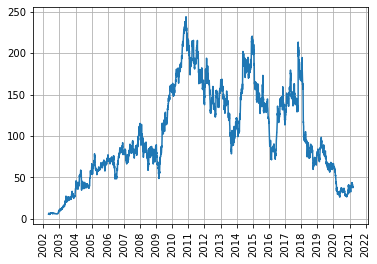

In [33]:
plt.plot(pnb.index,pnb['Adj Close'])  # create a fate vs Adj close
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  #making sure that data is arranged yearwise
plt.grid(True)    # shows grid in the graph
plt.xticks(rotation=90)  # rotates label of x axis
plt.show()

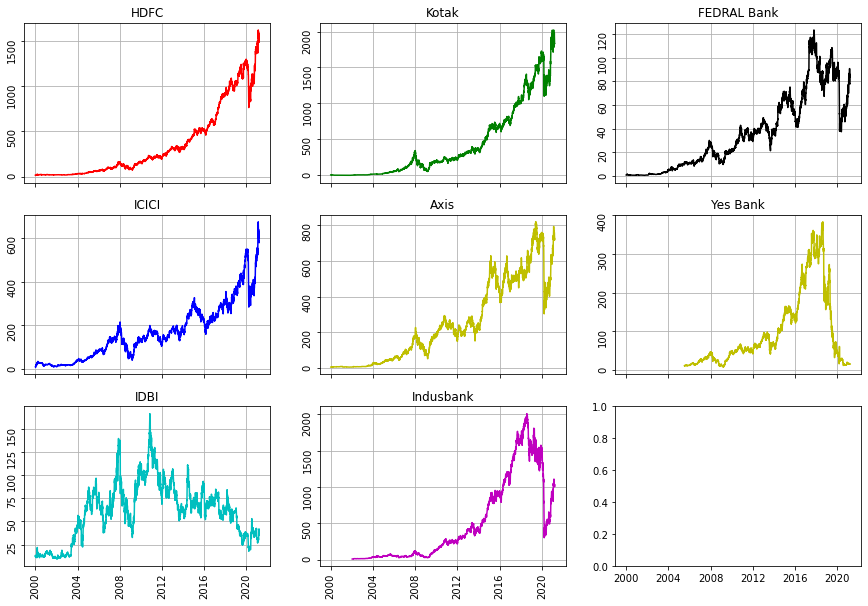

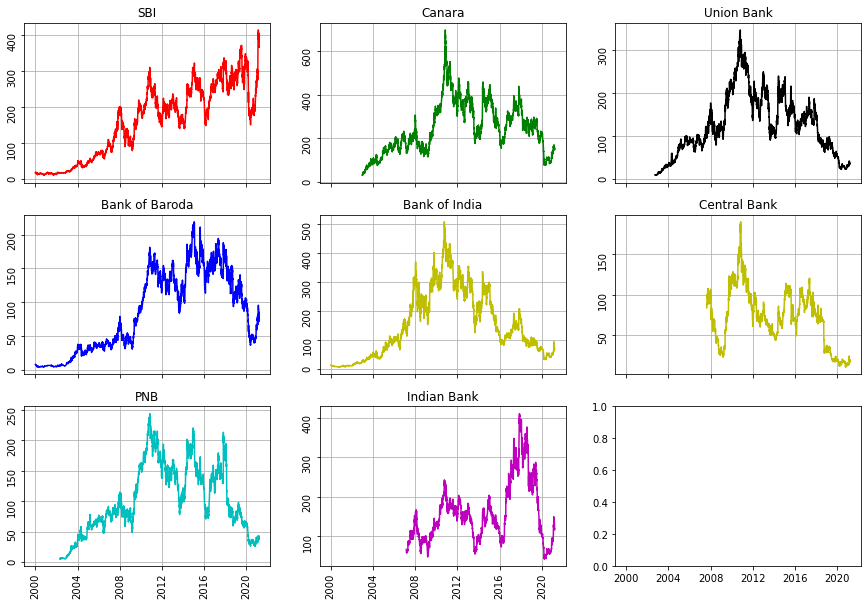

In [34]:
#Subplots for private banks
f, ax = plt.subplots(3, 3, figsize=(15,10), sharex=True)
f.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
f.gca().xaxis.set_major_locator(mdates.YearLocator())

ax[0,0].plot(hdfc.index, hdfc['Adj Close'], color='r')
ax[0,0].grid(True)
ax[0,0].tick_params(labelrotation=90)
ax[0,0].set_title('HDFC');

ax[0,1].plot(kotak.index, kotak['Adj Close'], color='g')
ax[0,1].grid(True)
ax[0,1].tick_params(labelrotation=90)
ax[0,1].set_title('Kotak');

ax[1,0].plot(icici.index, icici['Adj Close'], color='b')
ax[1,0].grid(True)
ax[1,0].tick_params(labelrotation=90)
ax[1,0].set_title('ICICI');

ax[1,1].plot(axis.index, axis['Adj Close'], color='y')
ax[1,1].grid(True)
ax[1,1].tick_params(labelrotation=90)
ax[1,1].set_title('Axis');


ax[0,2].plot(fbl.index, fbl['Adj Close'], color='k')
ax[0,2].grid(True)
ax[0,2].tick_params(labelrotation=90)
ax[0,2].set_title('FEDRAL Bank');

ax[2,1].plot(indus.index, indus['Adj Close'], color='m')
ax[2,1].grid(True)
ax[2,1].tick_params(labelrotation=90)
ax[2,1].set_title('Indusbank');

ax[2,0].plot(idbi.index, idbi['Adj Close'], color='c')
ax[2,0].grid(True)
ax[2,0].tick_params(labelrotation=90)
ax[2,0].set_title('IDBI');

ax[1,2].plot(yes.index, yes['Adj Close'], color='y')
ax[1,2].grid(True)
ax[1,2].tick_params(labelrotation=90)
ax[1,2].set_title('Yes Bank');



#Subplots for PSB
f, ax = plt.subplots(3, 3, figsize=(15,10), sharex=True)
f.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
f.gca().xaxis.set_major_locator(mdates.YearLocator())

ax[0,0].plot(sbi.index, sbi['Adj Close'], color='r')
ax[0,0].grid(True)
ax[0,0].tick_params(labelrotation=90)
ax[0,0].set_title('SBI');

ax[0,1].plot(canara.index, canara['Adj Close'], color='g')
ax[0,1].grid(True)
ax[0,1].tick_params(labelrotation=90)
ax[0,1].set_title('Canara');

ax[1,0].plot(bob.index, bob['Adj Close'], color='b')
ax[1,0].grid(True)
ax[1,0].tick_params(labelrotation=90)
ax[1,0].set_title('Bank of Baroda');

ax[1,1].plot(boi.index, boi['Adj Close'], color='y')
ax[1,1].grid(True)
ax[1,1].tick_params(labelrotation=90)
ax[1,1].set_title('Bank of India');


ax[0,2].plot(union.index, union['Adj Close'], color='k')
ax[0,2].grid(True)
ax[0,2].tick_params(labelrotation=90)
ax[0,2].set_title('Union Bank');

ax[2,1].plot(indian.index, indian['Adj Close'], color='m')
ax[2,1].grid(True)
ax[2,1].tick_params(labelrotation=90)
ax[2,1].set_title('Indian Bank');

ax[2,0].plot(pnb.index, pnb['Adj Close'], color='c')
ax[2,0].grid(True)
ax[2,0].tick_params(labelrotation=90)
ax[2,0].set_title('PNB');

ax[1,2].plot(cbi.index, cbi['Adj Close'], color='y')
ax[1,2].grid(True)
ax[1,2].tick_params(labelrotation=90)
ax[1,2].set_title('Central Bank');

> why all banks showed profit between 2010-2012
one of the reason I can think of is that market may be high

## Resampling

Resampling involves changing the frequency of ur time series analysis 
* frequency can be changed in 2 ways


1. down sampling : when u decrease the frequency of the samples 
       Sec to hour 
2. up sampling : when u increase the frequency of the samples 
        example meter to cm , km to mm, year to days etc

### Zooming-in

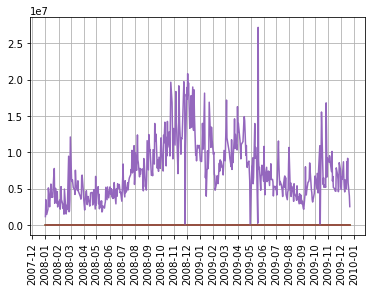

<Figure size 1080x720 with 0 Axes>

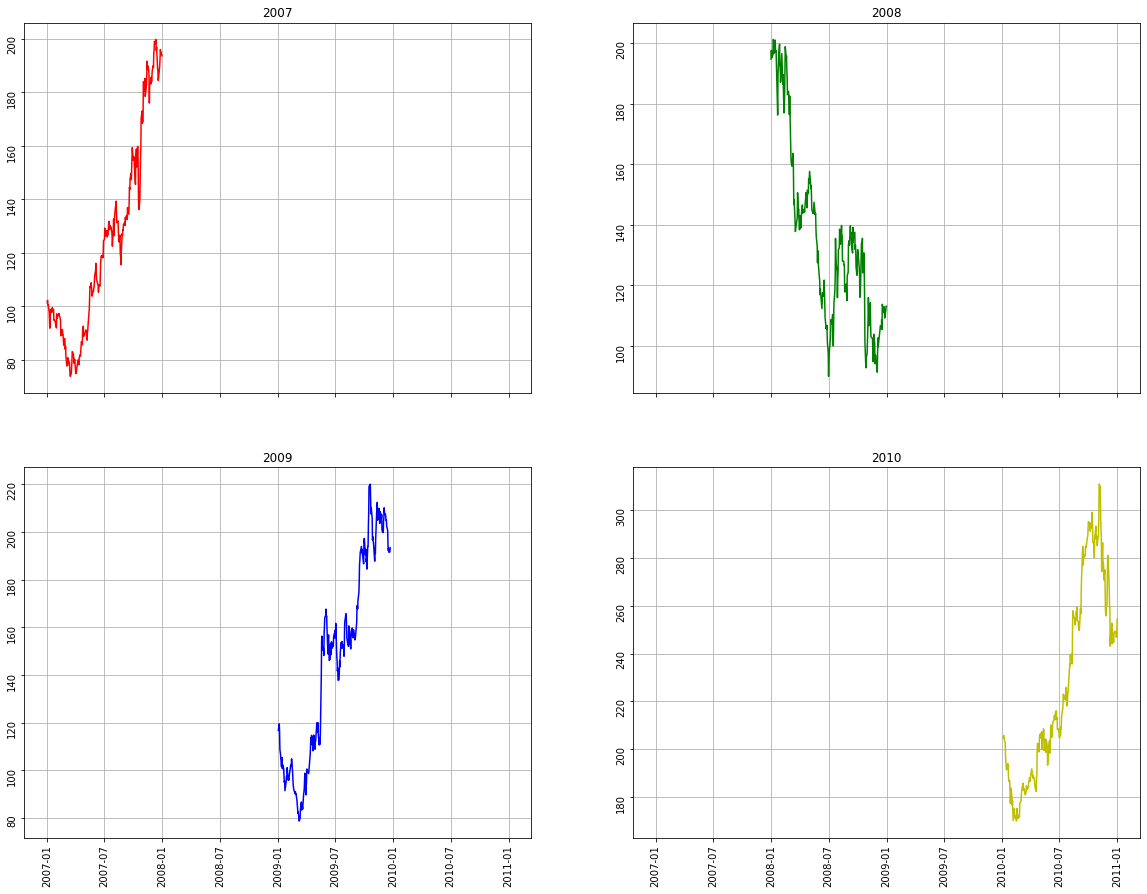

In [35]:
# recession 
sbi_07=sbi.loc[pd.Timestamp('2007-01-01'):pd.Timestamp('2007-12-31')]
sbi_08=sbi.loc[pd.Timestamp('2008-01-01'):pd.Timestamp('2008-12-31')]
sbi_09=sbi.loc[pd.Timestamp('2009-01-01'):pd.Timestamp('2009-12-31')]
sbi_10=sbi.loc[pd.Timestamp('2010-01-01'):pd.Timestamp('2010-12-31')]

sbi_0809= sbi.loc[pd.Timestamp('2008-01-01'):pd.Timestamp('2009-12-31')]
plt.plot(sbi_0809)
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=90)
plt.figure(figsize=(15, 10))
plt.show()

f, ax = plt.subplots(2,2, figsize=(20,15), sharex=True)
f.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
f.gca().xaxis.set_major_locator(mdates.MonthLocator())

ax[0,0].plot(sbi_07.index, sbi_07['Adj Close'], color='r')
ax[0,0].grid(True)
ax[0,0].tick_params(labelrotation=90)
ax[0,0].set_title('2007');

ax[0,1].plot(sbi_08.index, sbi_08['Adj Close'], color='g')
ax[0,1].grid(True)
ax[0,1].tick_params(labelrotation=90)
ax[0,1].set_title('2008');

ax[1,0].plot(sbi_09.index, sbi_09['Adj Close'], color='b')
ax[1,0].grid(True)
ax[1,0].tick_params(labelrotation=90)
ax[1,0].set_title('2009');

ax[1,1].plot(sbi_10.index, sbi_10['Adj Close'], color='y')
ax[1,1].grid(True)
ax[1,1].tick_params(labelrotation=90)
ax[1,1].set_title('2010');

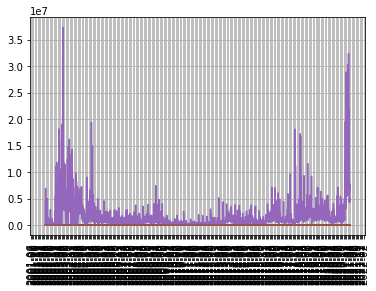

In [36]:
pnb_18=pnb.loc[pd.Timestamp('2020-01-01'):pd.Timestamp('2020-12-31')]
plt.plot(pnb)
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=90)
plt.show()

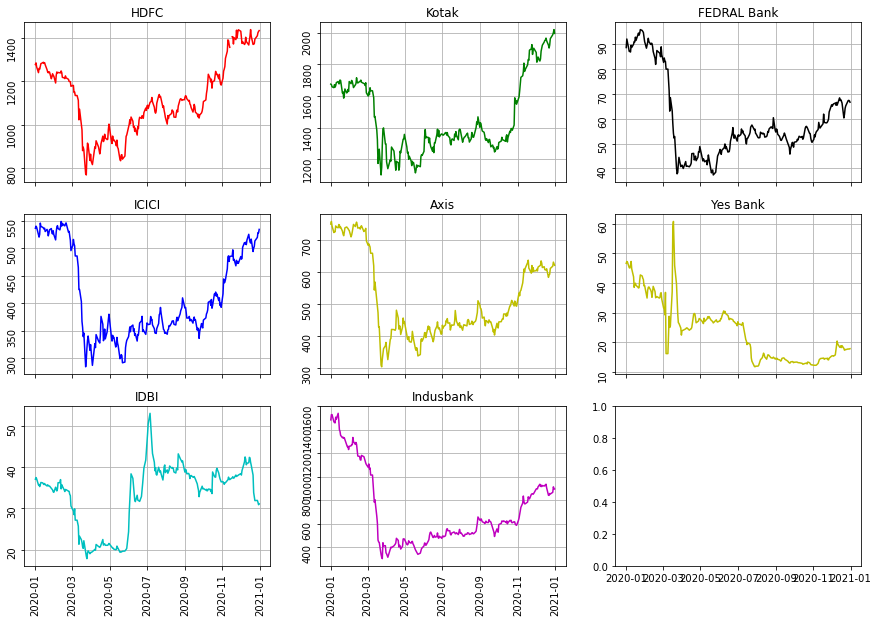

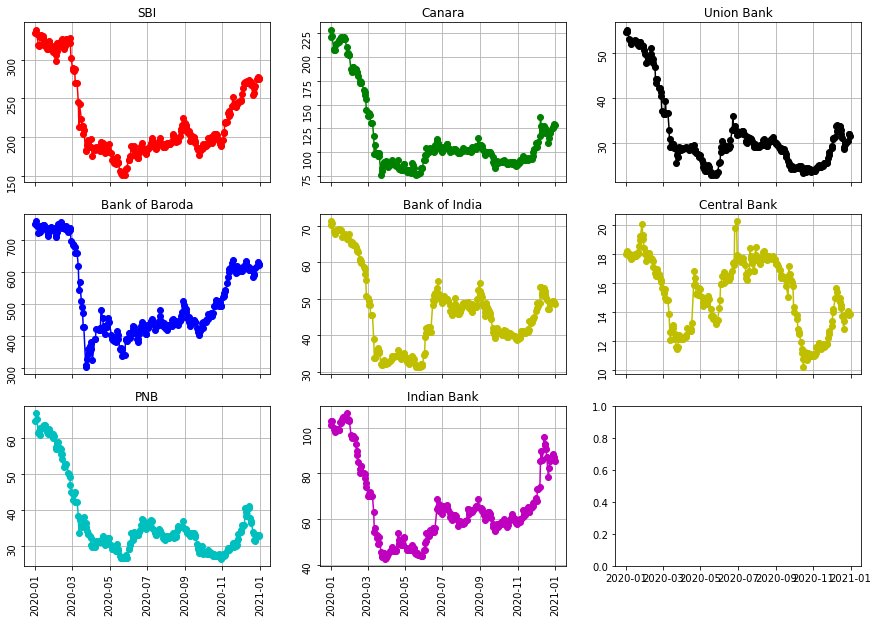

In [37]:
#Zooming in for all banks for 2020

#Subplots for private banks
f, ax = plt.subplots(3, 3, figsize=(15,10), sharex=True)
f.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
f.gca().xaxis.set_major_locator(mdates.YearLocator())

hdfc_2020= hdfc.loc[pd.Timestamp('2020-01-01'):pd.Timestamp('2020-12-31')]
ax[0,0].plot(hdfc_2020.index, hdfc_2020['Adj Close'], color='r')
ax[0,0].grid(True)
ax[0,0].tick_params(labelrotation=90)
ax[0,0].set_title('HDFC');

kotak_20 = kotak.loc[pd.Timestamp('2020-01-01'):pd.Timestamp('2020-12-31')]
ax[0,1].plot(kotak_20.index, kotak_20['Adj Close'], color='g')
ax[0,1].grid(True)
ax[0,1].tick_params(labelrotation=90)
ax[0,1].set_title('Kotak');

icici20 = icici.loc[pd.Timestamp('2020-01-01'):pd.Timestamp('2020-12-31')]
ax[1,0].plot(icici20.index, icici20['Adj Close'], color='b')
ax[1,0].grid(True)
ax[1,0].tick_params(labelrotation=90)
ax[1,0].set_title('ICICI');

axis20= axis.loc[pd.Timestamp('2020-01-01'):pd.Timestamp('2020-12-31')]
ax[1,1].plot(axis20.index, axis20['Adj Close'], color='y')
ax[1,1].grid(True)
ax[1,1].tick_params(labelrotation=90)
ax[1,1].set_title('Axis');

fbl20= fbl.loc[pd.Timestamp('2020-01-01'):pd.Timestamp('2020-12-31')]
ax[0,2].plot(fbl20.index, fbl20['Adj Close'], color='k')
ax[0,2].grid(True)
ax[0,2].tick_params(labelrotation=90)
ax[0,2].set_title('FEDRAL Bank');

indus20= indus.loc[pd.Timestamp('2020-01-01'):pd.Timestamp('2020-12-31')]
ax[2,1].plot(indus20.index, indus20['Adj Close'], color='m')
ax[2,1].grid(True)
ax[2,1].tick_params(labelrotation=90)
ax[2,1].set_title('Indusbank');

idbi20= idbi.loc[pd.Timestamp('2020-01-01'):pd.Timestamp('2020-12-31')]
ax[2,0].plot(idbi20.index, idbi20['Adj Close'], color='c')
ax[2,0].grid(True)
ax[2,0].tick_params(labelrotation=90)
ax[2,0].set_title('IDBI');

yes20= yes.loc[pd.Timestamp('2020-01-01'):pd.Timestamp('2020-12-31')]
ax[1,2].plot(yes20.index, yes20['Adj Close'], color='y')
ax[1,2].grid(True)
ax[1,2].tick_params(labelrotation=90)
ax[1,2].set_title('Yes Bank');



#Subplots for PSB
# Lets add scatterplot to this by adding '-o'

f, ax = plt.subplots(3, 3, figsize=(15,10), sharex=True)
f.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
f.gca().xaxis.set_major_locator(mdates.YearLocator())

sbi20= sbi.loc[pd.Timestamp('2020-01-01'):pd.Timestamp('2020-12-31')]
ax[0,0].plot(sbi20.index, sbi20['Adj Close'],'-o', color='r')
ax[0,0].grid(True)
ax[0,0].tick_params(labelrotation=90)
ax[0,0].set_title('SBI');

canara20= canara.loc[pd.Timestamp('2020-01-01'):pd.Timestamp('2020-12-31')]
ax[0,1].plot(canara20.index, canara20['Adj Close'],'-o', color='g')
ax[0,1].grid(True)
ax[0,1].tick_params(labelrotation=90)
ax[0,1].set_title('Canara');

bob20= axis.loc[pd.Timestamp('2020-01-01'):pd.Timestamp('2020-12-31')]
ax[1,0].plot(bob20.index, bob20['Adj Close'],'-o', color='b')
ax[1,0].grid(True)
ax[1,0].tick_params(labelrotation=90)
ax[1,0].set_title('Bank of Baroda');

boi20= boi.loc[pd.Timestamp('2020-01-01'):pd.Timestamp('2020-12-31')]
ax[1,1].plot(boi20.index, boi20['Adj Close'],'-o', color='y')
ax[1,1].grid(True)
ax[1,1].tick_params(labelrotation=90)
ax[1,1].set_title('Bank of India');

union20= union.loc[pd.Timestamp('2020-01-01'):pd.Timestamp('2020-12-31')]
ax[0,2].plot(union20.index, union20['Adj Close'],'-o', color='k')
ax[0,2].grid(True)
ax[0,2].tick_params(labelrotation=90)
ax[0,2].set_title('Union Bank');

indian20= indian.loc[pd.Timestamp('2020-01-01'):pd.Timestamp('2020-12-31')]
ax[2,1].plot(indian20.index, indian20['Adj Close'],'-o', color='m')
ax[2,1].grid(True)
ax[2,1].tick_params(labelrotation=90)
ax[2,1].set_title('Indian Bank');

pnb20= pnb.loc[pd.Timestamp('2020-01-01'):pd.Timestamp('2020-12-31')]
ax[2,0].plot(pnb20.index, pnb20['Adj Close'],'-o', color='c')
ax[2,0].grid(True)
ax[2,0].tick_params(labelrotation=90)
ax[2,0].set_title('PNB');

cbi20= cbi.loc[pd.Timestamp('2020-01-01'):pd.Timestamp('2020-12-31')]
ax[1,2].plot(cbi20.index, cbi20['Adj Close'],'-o', color='y')
ax[1,2].grid(True)
ax[1,2].tick_params(labelrotation=90)
ax[1,2].set_title('Central Bank');

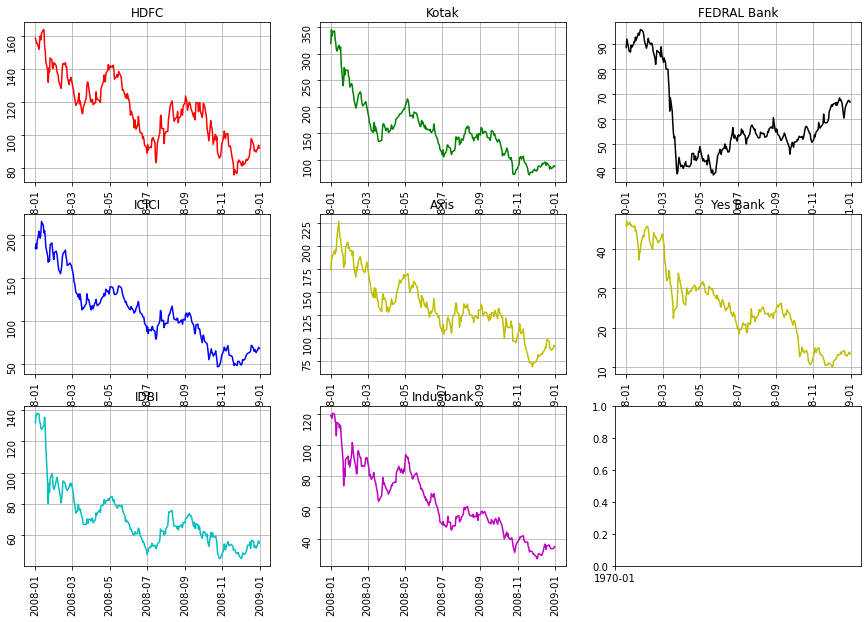

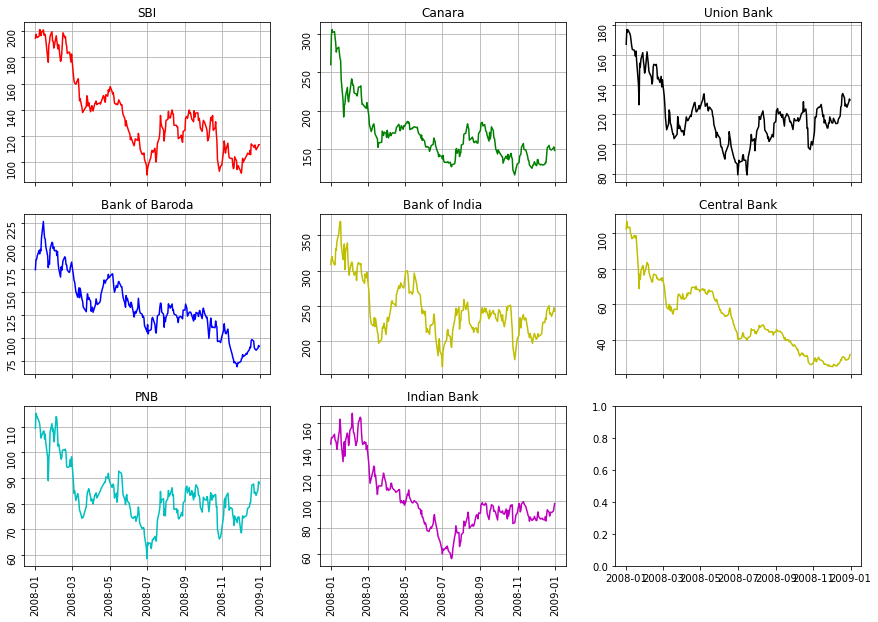

In [38]:
#Zooming in for all banks for 2008

#Subplots for private banks
f, ax = plt.subplots(3, 3, figsize=(15,10))
f.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
f.gca().xaxis.set_major_locator(mdates.MonthLocator())

hdfc_2008= hdfc.loc[pd.Timestamp('2008-01-01'):pd.Timestamp('2008-12-31')]  #slicing
ax[0,0].plot(hdfc_2008.index, hdfc_2008['Adj Close'], color='r')
ax[0,0].grid(True)
ax[0,0].tick_params(labelrotation=90)
ax[0,0].set_title('HDFC');

kotak_8 = kotak.loc[pd.Timestamp('2008-01-01'):pd.Timestamp('2008-12-31')]
ax[0,1].plot(kotak_8.index, kotak_8['Adj Close'], color='g')
ax[0,1].grid(True)
ax[0,1].tick_params(labelrotation=90)
ax[0,1].set_title('Kotak');

icici8 = icici.loc[pd.Timestamp('2008-01-01'):pd.Timestamp('2008-12-31')]
ax[1,0].plot(icici8.index, icici8['Adj Close'], color='b')
ax[1,0].grid(True)
ax[1,0].tick_params(labelrotation=90)
ax[1,0].set_title('ICICI');

axis8= axis.loc[pd.Timestamp('2008-01-01'):pd.Timestamp('2008-12-31')]
ax[1,1].plot(axis8.index, axis8['Adj Close'], color='y')
ax[1,1].grid(True)
ax[1,1].tick_params(labelrotation=90)
ax[1,1].set_title('Axis');

fbl8= fbl.loc[pd.Timestamp('2008-01-01'):pd.Timestamp('2008-12-31')]
ax[0,2].plot(fbl20.index, fbl20['Adj Close'], color='k')
ax[0,2].grid(True)
ax[0,2].tick_params(labelrotation=90)
ax[0,2].set_title('FEDRAL Bank');

indus8= indus.loc[pd.Timestamp('2008-01-01'):pd.Timestamp('2008-12-31')]
ax[2,1].plot(indus8.index, indus8['Adj Close'], color='m')
ax[2,1].grid(True)
ax[2,1].tick_params(labelrotation=90)
ax[2,1].set_title('Indusbank');

idbi8= idbi.loc[pd.Timestamp('2008-01-01'):pd.Timestamp('2008-12-31')]
ax[2,0].plot(idbi8.index, idbi8['Adj Close'], color='c')
ax[2,0].grid(True)
ax[2,0].tick_params(labelrotation=90)
ax[2,0].set_title('IDBI');

yes8= yes.loc[pd.Timestamp('2008-01-01'):pd.Timestamp('2008-12-31')]
ax[1,2].plot(yes8.index, yes8['Adj Close'], color='y')
ax[1,2].grid(True)
ax[1,2].tick_params(labelrotation=90)
ax[1,2].set_title('Yes Bank');



#Subplots for PSB
# Lets add scatterplot to this by adding '-o'

f, ax = plt.subplots(3, 3, figsize=(15,10), sharex=True)
f.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
f.gca().xaxis.set_major_locator(mdates.MonthLocator())

sbi8= sbi.loc[pd.Timestamp('2008-01-01'):pd.Timestamp('2008-12-31')]
ax[0,0].plot(sbi8.index, sbi8['Adj Close'],color='r')
ax[0,0].grid(True)
ax[0,0].tick_params(labelrotation=90)
ax[0,0].set_title('SBI');

canara8= canara.loc[pd.Timestamp('2008-01-01'):pd.Timestamp('2008-12-31')]
ax[0,1].plot(canara8.index, canara8['Adj Close'], color='g')
ax[0,1].grid(True)
ax[0,1].tick_params(labelrotation=90)
ax[0,1].set_title('Canara');

bob8= axis.loc[pd.Timestamp('2008-01-01'):pd.Timestamp('2008-12-31')]
ax[1,0].plot(bob8.index, bob8['Adj Close'], color='b')
ax[1,0].grid(True)
ax[1,0].tick_params(labelrotation=90)
ax[1,0].set_title('Bank of Baroda');

boi8= boi.loc[pd.Timestamp('2008-01-01'):pd.Timestamp('2008-12-31')]
ax[1,1].plot(boi8.index, boi8['Adj Close'], color='y')
ax[1,1].grid(True)
ax[1,1].tick_params(labelrotation=90)
ax[1,1].set_title('Bank of India');

union8= union.loc[pd.Timestamp('2008-01-01'):pd.Timestamp('2008-12-31')]
ax[0,2].plot(union8.index, union8['Adj Close'], color='k')
ax[0,2].grid(True)
ax[0,2].tick_params(labelrotation=90)
ax[0,2].set_title('Union Bank');

indian8= indian.loc[pd.Timestamp('2008-01-01'):pd.Timestamp('2008-12-31')]
ax[2,1].plot(indian8.index, indian8['Adj Close'], color='m')
ax[2,1].grid(True)
ax[2,1].tick_params(labelrotation=90)
ax[2,1].set_title('Indian Bank');

pnb8= pnb.loc[pd.Timestamp('2008-01-01'):pd.Timestamp('2008-12-31')]
ax[2,0].plot(pnb8.index, pnb8['Adj Close'], color='c')
ax[2,0].grid(True)
ax[2,0].tick_params(labelrotation=90)
ax[2,0].set_title('PNB');

cbi8= cbi.loc[pd.Timestamp('2008-01-01'):pd.Timestamp('2008-12-31')]
ax[1,2].plot(cbi8.index, cbi8['Adj Close'], color='y')
ax[1,2].grid(True)
ax[1,2].tick_params(labelrotation=90)
ax[1,2].set_title('Central Bank');

### **Resampling (Quarterly)**

Here from we will focus on 2 banks only HDFC and SBI

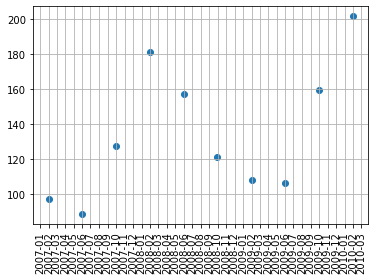

In [39]:
# I am intrested in 2007 crisis so will observe 2007-2009

sbi_crisis = sbi.loc[pd.Timestamp('2007-01-01'):pd.Timestamp('2009-12-31')]
monthly_sbi = sbi_crisis.resample('4M').mean()
plt.scatter(monthly_sbi.index, monthly_sbi['Adj Close'])
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=90)
#plt.figure(figsize=(35, 20))
plt.show()

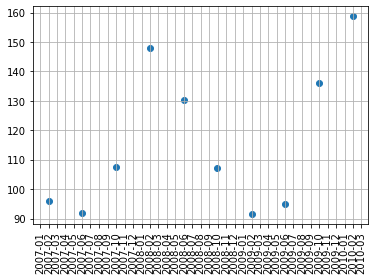

In [40]:
hdfc_crisis = hdfc.loc[pd.Timestamp('2007-01-01'):pd.Timestamp('2009-12-31')]
monthly_hdfc = hdfc_crisis.resample('4M').mean()
plt.scatter(monthly_hdfc.index, monthly_hdfc['Adj Close'])
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=90)
plt.show()

## Resampling weekly
Crisis data of :
sbi_crisis and hdfc_crisis

In [41]:
sbi_weekly = sbi_crisis.resample('W').mean()
sbi_weekly.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-01-07,119.500452,116.914024,118.270338,118.112297,2466333.75,101.150427
2007-01-14,114.009398,109.430492,112.843205,111.293001,5168296.40,95.310443
2007-01-21,117.180569,114.337744,116.015321,115.241637,3370214.60,98.692023
2007-01-28,114.510408,110.792936,113.269678,111.969976,5186962.25,95.890203
2007-02-04,113.649445,108.438850,110.698584,110.342403,7392782.75,94.496351


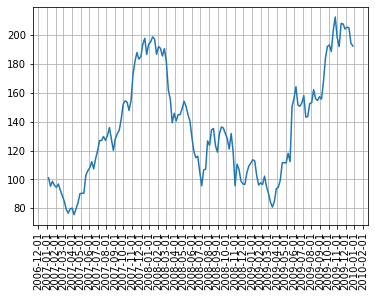

In [42]:
plt.plot(sbi_weekly.index, sbi_weekly['Adj Close'])
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=90)
plt.show()

In [43]:
hdfc_weekly = hdfc_crisis.resample('W').mean()
hdfc_weekly.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-07,105.902500,107.203748,104.775000,105.952501,96.460560,2604007.5
2007-01-14,102.223999,103.723999,100.290999,102.059000,92.915865,1138494.0
2007-01-21,108.039002,109.094000,106.401999,107.552000,97.916763,1320726.0
2007-01-28,105.702499,106.656250,104.207501,105.296251,95.863094,770855.0
2007-02-04,107.957500,110.166250,106.505001,108.605001,98.875418,1596730.0


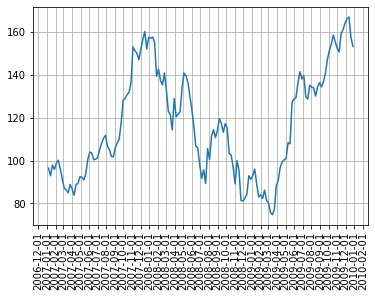

In [44]:
plt.plot(hdfc_weekly.index, hdfc_weekly['Adj Close'])
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=90)
plt.show()

thisi is irritation we need to fix this x axis labelling.

## Analysing Difference between Levels (Resampling Weekly)

In [45]:
sbi['diff'] = sbi['Open'] - sbi['Close']
sbi_diff = sbi.resample('W').mean()
sbi_diff.tail(10)

,High,Low,Open,Close,Volume,Adj Close,diff
Date,,,,,,,
2021-01-17,301.909998,291.499994,295.530005,298.540002,3076296.8,298.540002,-3.009998
2021-01-24,303.800000,291.910004,300.190002,294.790002,1923097.6,294.790002,5.400000
2021-01-31,286.675003,274.587494,281.512505,280.237495,2455987.5,280.237495,1.275009
2021-02-07,351.709998,327.920001,330.779999,345.660004,6674204.4,345.660004,-14.880005
2021-02-14,401.040002,389.120001,394.800000,393.390002,2802297.4,393.390002,1.409998
2021-02-21,416.340002,400.970001,410.279999,407.119995,4050634.0,407.119995,3.160004
2021-02-28,406.319995,392.680005,400.209998,398.039996,4099351.2,398.039996,2.170001
2021-03-07,400.910004,390.000006,396.600000,394.719995,3261605.6,394.719995,1.880005
2021-03-14,393.537491,382.987503,391.024994,386.437500,2024244.5,386.437500,4.587494


In [46]:
hdfc['diff'] = hdfc['Open'] - hdfc['Close']
hdfc_diff = hdfc.resample('W').mean()
hdfc_diff.tail(10)

,Open,High,Low,Close,Adj Close,Volume,diff
Date,,,,,,,
2021-01-17,1467.569995,1481.700000,1449.790015,1467.490015,1467.490015,321012.00,0.079980
2021-01-24,1486.340015,1496.650000,1466.139990,1479.019995,1479.019995,636183.00,7.320020
2021-01-31,1429.112488,1440.250000,1392.012512,1408.300018,1408.300018,343161.75,20.812470
2021-02-07,1524.140014,1569.520019,1507.039990,1557.559985,1557.559985,529500.80,-33.419971
2021-02-14,1596.080005,1612.230005,1577.400000,1591.010034,1591.010034,258174.00,5.069971
2021-02-21,1598.170020,1611.570020,1574.000000,1584.470020,1584.470020,301110.40,13.700000
2021-02-28,1564.419995,1601.350024,1540.400000,1565.080005,1565.080005,631655.60,-0.660010
2021-03-07,1562.020020,1574.369971,1543.630005,1558.879980,1558.879980,430017.80,3.140039
2021-03-14,1557.000000,1571.899994,1535.174988,1547.375030,1547.375030,259445.75,9.624970


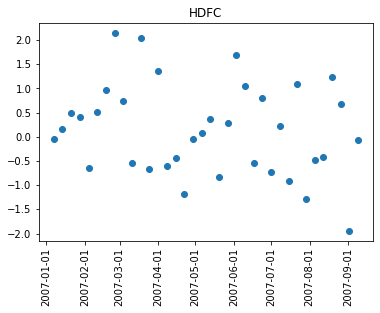

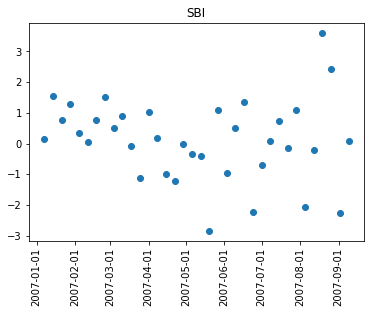

In [47]:
plt.scatter(hdfc_diff.loc['2007-01-01':'2007-09-15'].index, hdfc_diff.loc['2007-01-01':'2007-09-15']['diff'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=90)
plt.title("HDFC")
plt.show()

plt.scatter(sbi_diff.loc['2007-01-01':'2007-09-15'].index, sbi_diff.loc['2007-01-01':'2007-09-15']['diff'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=90)
plt.title("SBI")
plt.show()

# 3. Moving Windows

### Daily percentage

In [48]:
daily_close_sbi = sbi[['Adj Close']]

# Daily returns
daily_pct_change_sbi = daily_close_sbi.pct_change()

# Replace NA values with 0
daily_pct_change_sbi.fillna(0, inplace=True)

daily_pct_change_sbi.head()

,Adj Close
Date,
2000-01-03,0.000000
2000-01-04,0.070045
2000-01-05,-0.042357
2000-01-06,0.041416
2000-01-07,0.076834


In [49]:
daily_close_hdfc = hdfc[['Adj Close']]

# Daily returns
daily_pct_change_hdfc = daily_close_hdfc.pct_change()

# Replace NA values with 0
daily_pct_change_hdfc.fillna(0, inplace=True)

daily_pct_change_hdfc.head()

,Adj Close
Date,
2000-01-03,0.000000
2000-01-04,-0.002294
2000-01-05,-0.031609
2000-01-06,-0.005935
2000-01-07,0.011941


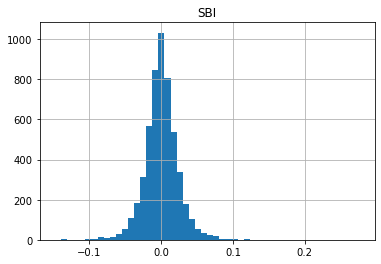

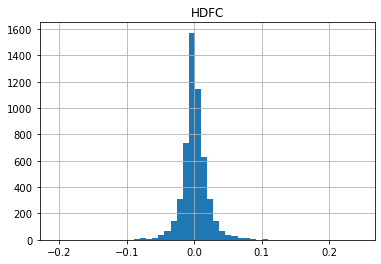

In [50]:
daily_pct_change_sbi.hist(bins=50)

# Show the plot
plt.title("SBI")
plt.show()

daily_pct_change_hdfc.hist(bins=50)

# Show the plot
plt.title("HDFC")
plt.show()

In [51]:
import seaborn as sns
sns.set()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


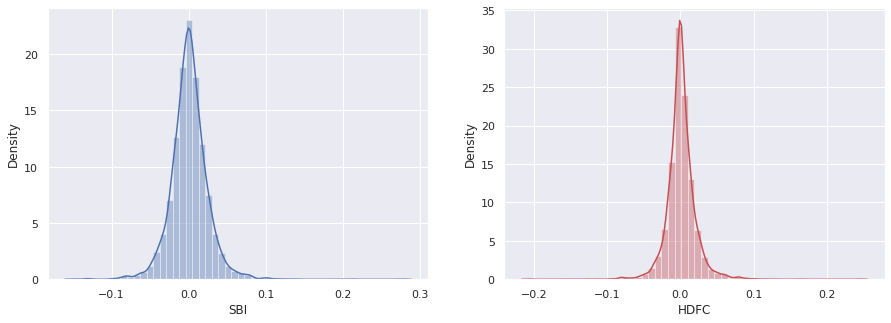

In [52]:
# Set up the matplotlib figure
f, axes = plt.subplots(1,2 , figsize=(15, 5))

# Plot a simple histogram with binsize determined automatically
sns.distplot(daily_pct_change_sbi['Adj Close'], color="b", ax=axes[0], axlabel='SBI');

# Plot a kernel density estimate and rug plot
sns.distplot(daily_pct_change_hdfc['Adj Close'], color="r", ax=axes[1], axlabel='HDFC');


here we can see both the stock have not return a loss of -0.1 nor have return a profit of 0.1: This implies that these stock can neither fetch u much money nor u will lose much money.

# 4. Volatality

Chnage in the variance in the return of stock over a specific period of time.
higher the volatility more risky investment and so on.

In [53]:
import numpy as np

min_periods = 75 

# Calculate the volatility
vol = daily_pct_change_sbi.rolling(min_periods).std() * np.sqrt(min_periods) 

vol.fillna(0,inplace=True)

vol.tail()

,Adj Close
Date,
2021-03-15,0.238749
2021-03-16,0.239420
2021-03-17,0.241762
2021-03-18,0.241730
2021-03-19,0.241626


In [54]:
min_periods = 75 

# Calculate the volatility
vol_h = daily_pct_change_hdfc.rolling(min_periods).std() * np.sqrt(min_periods) 

vol_h.fillna(0,inplace=True)

vol_h.tail()

,Adj Close
Date,
2021-03-15,0.162258
2021-03-16,0.160553
2021-03-17,0.160226
2021-03-18,0.160011
2021-03-19,0.159957


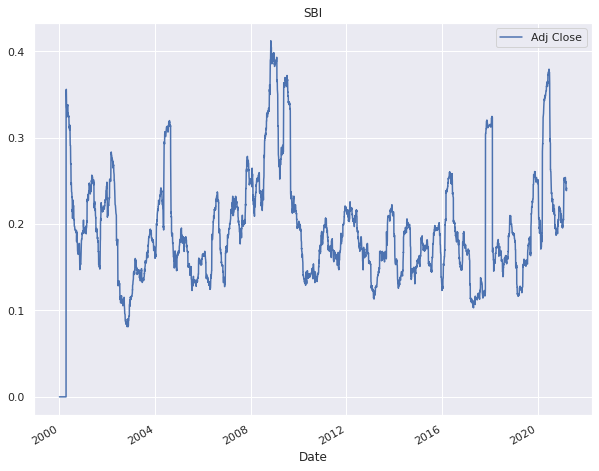

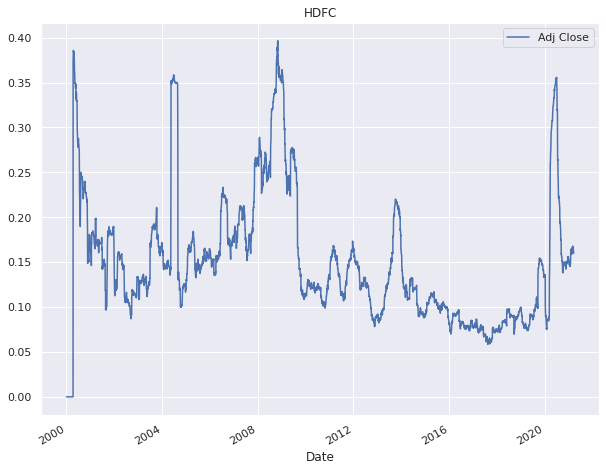

In [55]:
# Plot the volatility
vol.plot(figsize=(10, 8))
plt.title("SBI")
# Show the plot
plt.show()

vol_h.plot(figsize=(10, 8))
plt.title("HDFC")
# Show the plot
plt.show()

### Rolling Mean (Trends and Seasonality)

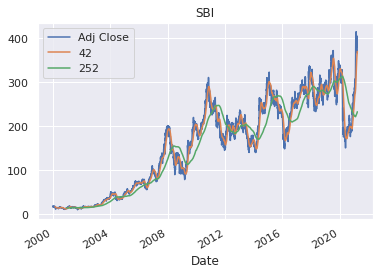

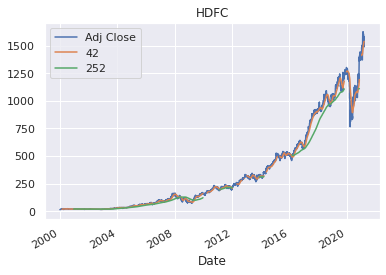

In [56]:
sbi_adj_close_px = sbi['Adj Close']
# Short moving window rolling mean
sbi['42'] = sbi_adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
sbi['252'] = sbi_adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
sbi[['Adj Close', '42', '252']].plot(title="SBI")

#plt.figure(figsize=(15,10))
#plt.figure(figsize=(35, 20))
# Show plot
plt.show()

hdfc_adj_close_px = hdfc['Adj Close']
# Short moving window rolling mean
hdfc['42'] = hdfc_adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
hdfc['252'] = hdfc_adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
hdfc[['Adj Close', '42', '252']].plot(title="HDFC")

# Show plot
plt.show()

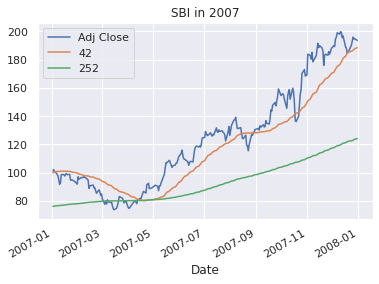

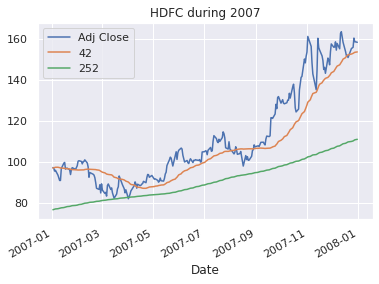

In [57]:
sbi.loc['2007-01-01':'2007-12-31'][['Adj Close', '42', '252']].plot(title="SBI in 2007");
hdfc.loc['2007-01-01':'2007-12-31'][['Adj Close', '42', '252']].plot(title="HDFC during 2007");

## Keep in mind and find answers
1. Effect of recession on stock price 2007 (06-08)
2. performance during Covid
3. check its price during demonetisation
4. compare capital of banks [iska source kya hoga]
5. Compare stock value of banks with BSE and NSE exchange rates.
6. Compare the casa ratio of Banks
7. compare npa crisis and gdp.
8. Also check for money infused in banks and its effect on stock price.

# Can write paper on: Effect of NPA,Recession, GDP and demonetisation banking industry.

1. Is GDP and stock price related atleast of banks stock.
2. How did demonetisaton, recession and covid affect financial institutes in India
3. try to do NLP analysis of balansheet of banks to get better idea



* other topic why fibonnachi series is a myth

# Way ahead
Try these concenpt and immplement it on samsung, apple and tesla and see if stock price depends on product launch

# Conclusion
 resampling 

about Intro
1. Tell me about ur self. UR projects,ur understanding
	how u have done, challenges faced by u
	present them ur strong topic
	DON'T THROUGH LOSE ENDS	
Story telling matters in case of Data Scientist.
	if u don't know its cool
	Don't fake